Practice

1.PCA

In [4]:
import numpy as np # Linear algebra library
import matplotlib.pyplot as plt # library for visualization
from sklearn.decomposition import PCA # PCA library
import pandas as pd # Data frame library
import math # Library for math functions
import random 

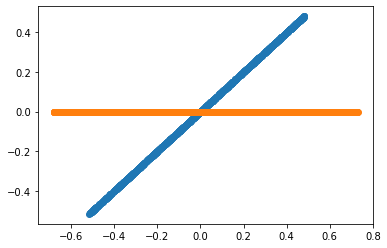

In [5]:
n = 1 # The amount of the correlation

x = np.random.uniform(1,2,1000) # Generate 1000 samples from a uniform random variable
y = x.copy() * n # Make y = n * x

# PCA works better if the data is centered
x = x - np.mean(x) # Center x. Remove its mean
y = y - np.mean(y) # Center y. Remove its mean
data = pd.DataFrame({'x': x, 'y': y}) # Create a data frame with x and y
plt.scatter(data.x, data.y) # Plot the original correlated data in blue
pca = PCA(n_components=2) # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally, it gets the rotation
# matrix and the explained variance
pcaTr = pca.fit(data)
rotatedData = pcaTr.transform(data) # Transform the data base on the rotation matrix of pcaTr

# # Create a data frame with the new variables. We call these new variables PC1 and PC2
dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2'])

# Plot the transformed data in orange
plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.show()

In [6]:
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)
print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)



Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Eigenvalues or explained variance
[1.65086357e-01 2.37668837e-33]


angle:  45.0
rotationMatrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


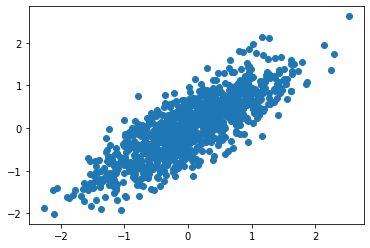

In [7]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
random.seed(100)
std1 = 1 # The desired standard deviation of our first random variable
std2 = 0.333 # The desired standard deviation of our second random variable
x = np.random.normal(0, std1, 1000) # Get 1000 samples from x ~ N(0, std1)
y = np.random.normal(0, std2, 1000) # Get 1000 samples from y ~ N(0, std2)
#y = y + np.random.normal(0,1,1000)*noiseLevel * np.sin(0.78)
# PCA works better if the data is centered
x = x - np.mean(x) # Center x
y = y - np.mean(y) # Center y
#Define a pair of dependent variables with a desired amount of covariance
n = 1 # Magnitude of covariance.
angle = np.arctan(1 / n) # Convert the covariance to and angle
print('angle: ', angle * 180 / math.pi)
# Create a rotation matrix using the given angle
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],
[-np.sin(angle), np.cos(angle)]])
print('rotationMatrix')
print(rotationMatrix)
xy = np.concatenate(([x] , [y]), axis=0).T # Create a matrix with columns x and y
# Transform the data using the rotation matrix. It correlates the two variables
data = np.dot(xy, rotationMatrix) # Return a nD array
# Print the rotated data
plt.scatter(data[:,0], data[:,1])
plt.show()

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.72183763  0.69206245]
 [-0.69206245  0.72183763]]

Eigenvalues or explained variance
[0.98101653 0.09935052]


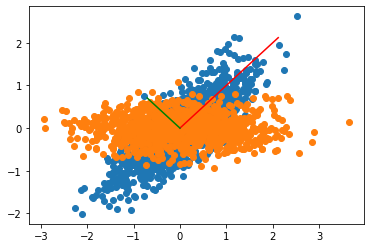

In [8]:
plt.scatter(data[:,0], data[:,1]) # Print the original data in blue
# Apply PCA. In theory, the Eigenvector matrix must be the
# inverse of the original rotationMatrix.
pca = PCA(n_components=2) # Instantiate a PCA. Choose to get 2 output variables
# Create the transformation model for this data. Internally it gets the rotation
# matrix and the explained variance
pcaTr = pca.fit(data)
# Create an array with the transformed data
dataPCA = pcaTr.transform(data)
print('Eigenvectors or principal component: First row must be in the direction of [1, n]'
)
print(pcaTr.components_)
print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)
# Print the rotated data
plt.scatter(dataPCA[:,0], dataPCA[:,1])
# Plot the first component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
# Plot the second component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')
plt.show()

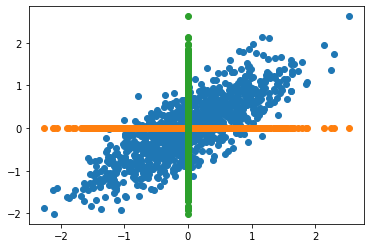

In [9]:
nPoints = len(data)
# Plot the original data in blue
plt.scatter(data[:,0], data[:,1])
#Plot the projection along the first component in orange
plt.scatter(data[:,0], np.zeros(nPoints))
#Plot the projection along the second component in green
plt.scatter(np.zeros(nPoints), data[:,1])
plt.show()

Eigenfaces_PCA_SVM

In [10]:
%matplotlib inline

In [11]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 4096)

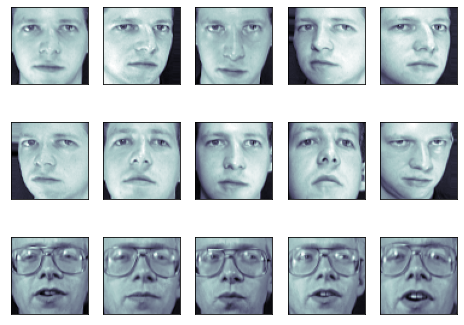

In [12]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.images[i], cmap=plt.cm.bone)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
faces.target, random_state=0)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [14]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)


PCA(n_components=150, whiten=True)

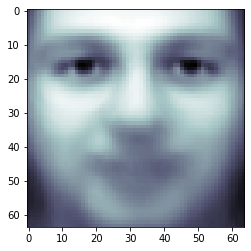

In [15]:
#mean face
plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [16]:
print(pca.components_.shape)

(150, 4096)


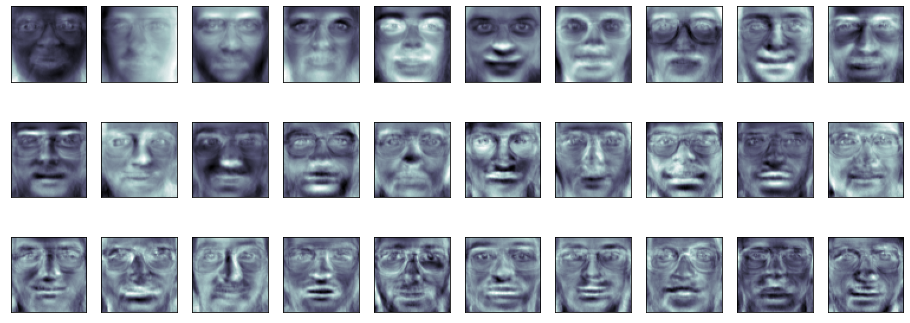

In [17]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [18]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)


(300, 150)
(100, 150)


In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)


GaussianNB()

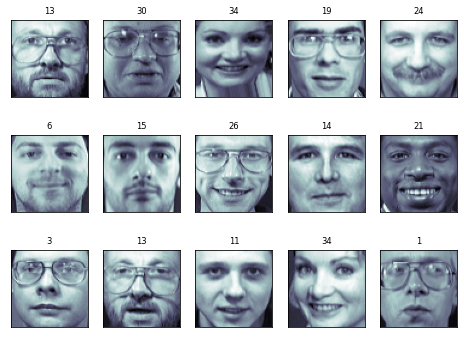

In [20]:
import numpy as np

fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
    cmap=plt.cm.bone)
    y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [21]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       1.00      0.75      0.86         4
           2       0.67      1.00      0.80         2
           3       0.17      1.00      0.29         1
           4       1.00      1.00      1.00         1
           5       1.00      0.80      0.89         5
           6       0.80      1.00      0.89         4
           7       1.00      0.67      0.80         3
           9       0.25      1.00      0.40         1
          10       1.00      1.00      1.00         4
          11       0.50      1.00      0.67         1
          12       0.50      1.00      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          19       0.80    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [22]:
print(metrics.confusion_matrix(y_test, y_pred))


[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


In [23]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),('gnb', GaussianNB())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


Naive Bayes using PCA on iris dataset.

In [24]:
from sklearn import datasets
from matplotlib import pyplot as plt


In [25]:
data = datasets.load_iris()

In [29]:
X = data.data
Y = data.target

X.shape,Y.shape

((150, 4), (150,))

Run PCA on IRIS dataset. Visualise the output in
2 dimensions using to Principal components

Run PCA + Naive Bayes classifier on IRIS dataset and calculate
precision and recall of the system.

 dimensionality reduction 4 to 3

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=4)
pca = decomposition.PCA(n_components=3,whiten=True)
pca.fit(x_train)
print(pca.components_.shape)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape,x_test_pca.shape)

gnb = GaussianNB()
gnb.fit(x_train_pca, y_train)
target_pred = gnb.predict(x_test_pca)
print(metrics.accuracy_score(y_test,target_pred))

precision = precision_score(y_test,target_pred,average = 'weighted')
print('Precision is: {}'.format(precision))

recall = recall_score(y_test,target_pred,average = 'weighted')
print('Recall is: {}'.format(recall))

## weighted : Calculate metrics for each label, and find their average weighted by support  

(3, 4)
(112, 3) (38, 3)
0.9473684210526315
Precision is: 0.9578947368421052
Recall is: 0.9473684210526315


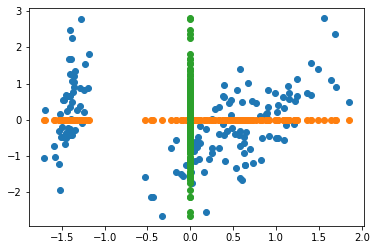

In [31]:
import numpy as np

trns_x = pca.transform(X)

nPoints = len(trns_x)
#Plot the original data in blue
plt.scatter(trns_x[:,0], trns_x[:,1])
#Plot the projection along the first component in orange
plt.scatter(trns_x[:,0], np.zeros(nPoints))
#Plot the projection along the second component in green
plt.scatter(np.zeros(nPoints), trns_x[:,1])
plt.show()



 dimensionality reduction 4 to 2

In [35]:

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=4)
pca = decomposition.PCA(n_components=2,whiten=True)
pca.fit(x_train)
print(pca.components_.shape)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape,x_test_pca.shape)

gnb = GaussianNB()
gnb.fit(x_train_pca, y_train)
target_pred = gnb.predict(x_test_pca)
print(metrics.accuracy_score(y_test,target_pred))

precision = precision_score(y_test,target_pred,average = 'weighted')
print('Precision is: {}'.format(precision))

recall = recall_score(y_test,target_pred,average = 'weighted')
print('Recall is: {}'.format(recall))


(2, 4)
(112, 2) (38, 2)
0.9210526315789473
Precision is: 0.9425837320574163
Recall is: 0.9210526315789473


dimensionality reduction 4 to 1

In [36]:

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=4)
pca = decomposition.PCA(n_components=1,whiten=True)
pca.fit(x_train)
print(pca.components_.shape)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape,x_test_pca.shape)

gnb = GaussianNB()
gnb.fit(x_train_pca, y_train)
target_pred = gnb.predict(x_test_pca)
print(metrics.accuracy_score(y_test,target_pred))

precision = precision_score(y_test,target_pred,average = 'weighted')
print('Precision is: {}'.format(precision))

recall = recall_score(y_test,target_pred,average = 'weighted')
print('Recall is: {}'.format(recall))

(1, 4)
(112, 1) (38, 1)
0.9736842105263158
Precision is: 0.9757085020242916
Recall is: 0.9736842105263158


Naive Bayes Without PCA

In [37]:
X = data.data
Y = data.target

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=4)
gnb = GaussianNB()
gnb.fit(x_train, y_train)
target_pred = gnb.predict(x_test)
print(metrics.accuracy_score(y_test,target_pred))

precision = precision_score(y_test,target_pred,average = 'weighted')
print('Precision is: {}'.format(precision))

recall = recall_score(y_test,target_pred,average = 'weighted')
print('Recall is: {}'.format(recall))

0.9736842105263158
Precision is: 0.976608187134503
Recall is: 0.9736842105263158


near to same result from using n_components=3 and n_component=4 (which is original) 
hence PCA is useful for dimensionality reduction.